In [1]:
#import packages
from fbprophet import Prophet 
import pandas as pd

#load data 
netflix = pd.read_csv('netflix.googletrends.csv', parse_dates= ['period'])

In [2]:
netflix.head()

,Unnamed: 0,date,value,period,onediffvalue
0,0,Oct 07 2013,20421.869782,2013-10-07,NaN
1,1,Oct 08 2013,19434.148574,2013-10-08,-987.721208
2,2,Oct 09 2013,19697.352780,2013-10-09,263.204206
3,3,Oct 10 2013,19669.810502,2013-10-10,-27.542278
4,4,Oct 11 2013,20872.271329,2013-10-11,1202.460828


In [3]:
#create new data frame with only 2 variables: dates and values on that date
prophetdataframe= pd.DataFrame()

In [4]:
prophetdataframe['ds'] = netflix['period']
prophetdataframe['y'] = netflix['value']

In [5]:
m = Prophet()
m.fit(prophetdataframe) #my model

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future=m.make_future_dataframe(periods= 365) #create empty data frame of dates for the next year 

In [7]:
forecast = m.predict(future) #predicting future value (y hat)

In [8]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2181,2019-09-27,20358.353697,15058.325677,21198.472566,18616.110912,22147.096585,-2328.832300,-2328.832300,-2328.832300,-1152.399739,-1152.399739,-1152.399739,-1176.432561,-1176.432561,-1176.432561,0.0,0.0,0.0,18029.521396
2182,2019-09-28,20360.895939,20080.268790,26142.398403,18613.251021,22153.649238,2752.005919,2752.005919,2752.005919,3845.897561,3845.897561,3845.897561,-1093.891642,-1093.891642,-1093.891642,0.0,0.0,0.0,23112.901858
2183,2019-09-29,20363.438182,21367.885805,27279.546197,18604.055389,22160.021810,3985.707337,3985.707337,3985.707337,4984.905669,4984.905669,4984.905669,-999.198332,-999.198332,-999.198332,0.0,0.0,0.0,24349.145519
2184,2019-09-30,20365.980425,15680.560862,21439.870437,18598.161424,22166.394382,-1752.975494,-1752.975494,-1752.975494,-858.263604,-858.263604,-858.263604,-894.711890,-894.711890,-894.711890,0.0,0.0,0.0,18613.004931
2185,2019-10-01,20368.522667,14590.522169,20452.223175,18588.623342,22173.086715,-2967.171636,-2967.171636,-2967.171636,-2184.065990,-2184.065990,-2184.065990,-783.105645,-783.105645,-783.105645,0.0,0.0,0.0,17401.351032


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


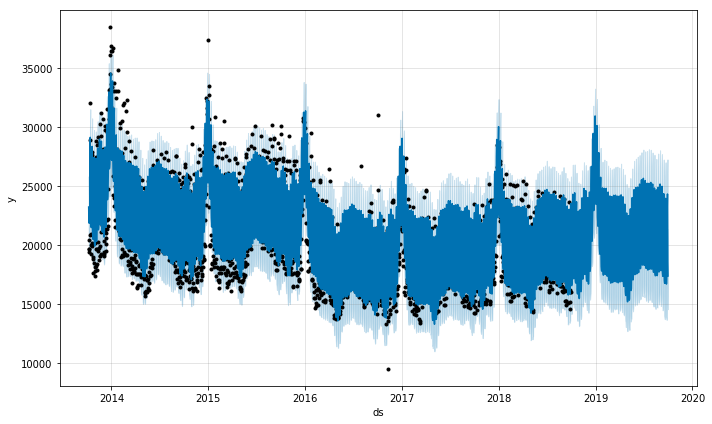

In [9]:
fig1 = m.plot(forecast) #building profit model 
#black dots = observed values --> actual trend values on those day 
#dark blue = error in observation for each day, thicker the dark blue the more error in the model (ideally no dark blue) 
#light blue = confidence interval at 95 percentile --> where we want the observed values to fall within

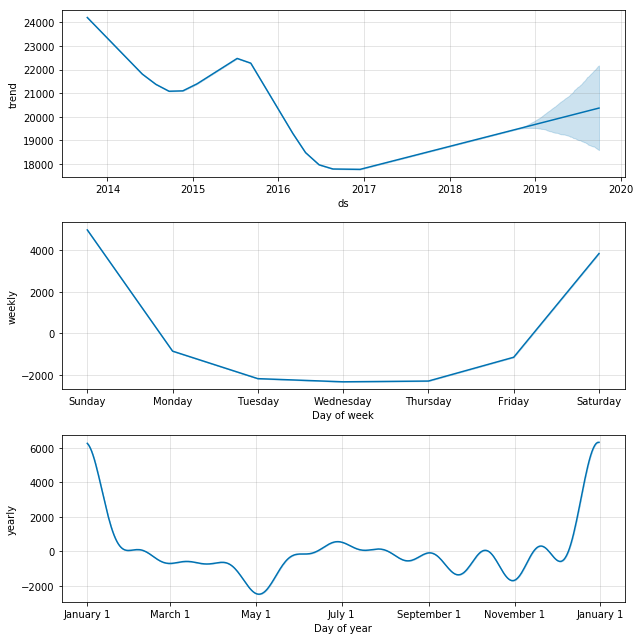

In [10]:
fig2 = m.plot_components(forecast) #seasonality
#both models agree interest is slightly increasing 
#second graph shows the day of the week that matters --> peak interest is on the weekend 
#third graph shows trend by month --> peaks in the winter 

In [11]:
erroranalytics = m.predict(prophetdataframe)

In [15]:
erroranalytics['value'] = prophetdataframe['y']
erroranalytics['residuals'] = erroranalytics['value'] - erroranalytics['yhat']

#abs value of residuals 
erroranalytics['absoluteresiduals'] = abs(erroranalytics['residuals'])

total_error = erroranalytics['absoluteresiduals'].sum()

In [16]:
#on average by day this is how far my model is off
print(total_error/len(erroranalytics))

1303.39639082389


In [18]:
erroranalytics['value'].describe()

count     1821.000000
mean     20087.361298
std       4248.543722
min       9549.101276
25%      16917.112773
50%      19042.681577
75%      22216.026780
max      38499.219401
Name: value, dtype: float64